In [89]:
import pandas as pd

In [90]:
df_COVID = pd.read_csv(r"C:\Users\DELL\Downloads\covid_19_clean_complete.csv")
df_COVID.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [91]:
df_COVID.shape

(49068, 10)

In [92]:
df_COVID.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [93]:
df_COVID.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [94]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\DELL\AppData\Local\Temp\ipykernel_4524\3595348280.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


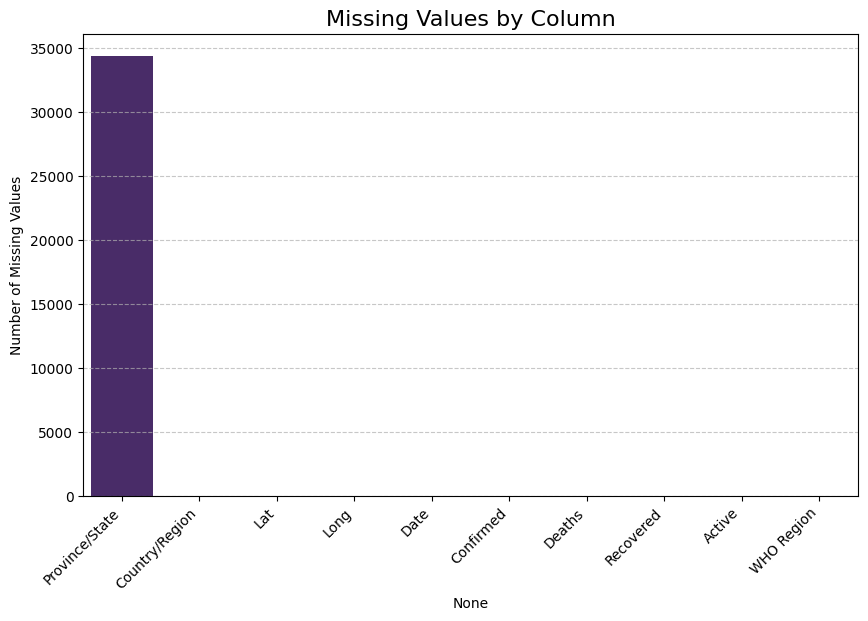

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [95]:
# Convert 'Date' to datetime format
df_COVID['Date'] = pd.to_datetime(df_COVID['Date'])

# Check for missing values in each column
missing_values = df_COVID.isnull().sum()

# Plot missing values as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Missing Values by Column", fontsize=16)
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display missing values summary
missing_values

In [96]:
df_COVID['Province/State'].fillna('Unknown', inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_4524\1065417853.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_COVID['Province/State'].fillna('Unknown', inplace=True)


In [97]:
# Active Case = confirmed - deaths - recovered
df_COVID['Active'] = df_COVID['Confirmed'] - df_COVID[ 'Deaths'] - df_COVID['Recovered']

In [98]:
from datetime import datetime as dt

df_COVID['Date'] = df_COVID['Date'].dt.normalize()
df_COVID['Date'] = df_COVID['Date'].dt.strftime('%Y-%m-%d')

In [99]:
total_cases = df_COVID.loc[:, ['Date', 'Confirmed']].groupby('Date').sum().reset_index()
total_cases

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


Text(0.5, 1.0, 'Worldwide Confirmed Cases Over Time')

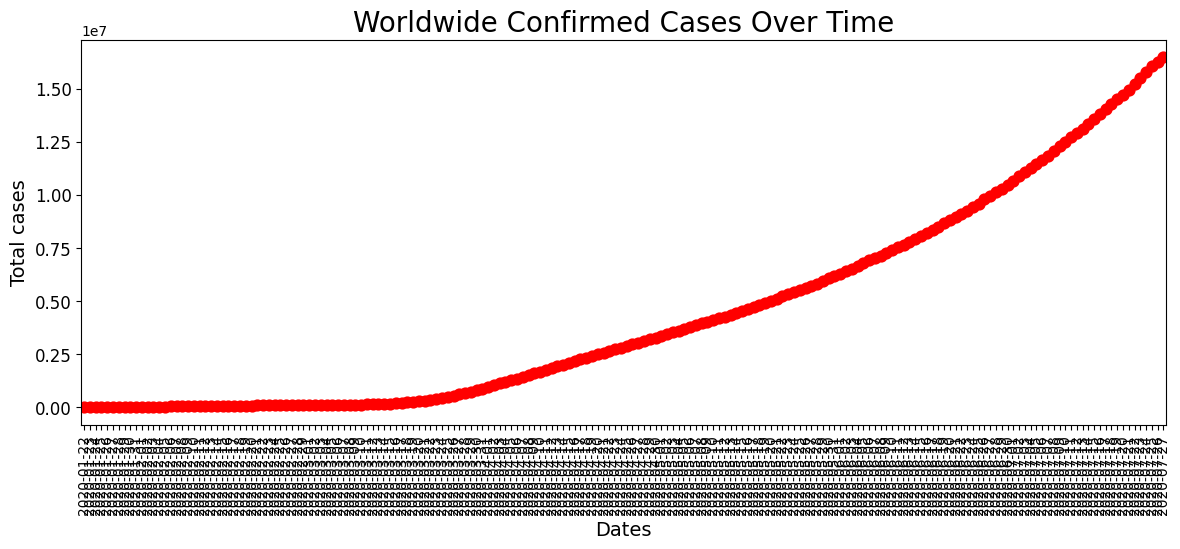

In [100]:
plt.figure(figsize= (14,5))

ax = sns.pointplot(x=total_cases['Date'],
                   y=total_cases['Confirmed'],
                   color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)

plt.xlabel('Dates', fontsize=14)
plt.ylabel('Total cases', fontsize=14)
plt.title('Worldwide Confirmed Cases Over Time', fontsize=20)

In [101]:
#top = df_COVID.loc[df_COVID['Date'] == df_COVID['Date'].max()]
#top

In [102]:
top_casualities = top.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending =False).head(10).reset_index()

top_casualities

,Country/Region,Confirmed
0,US,224345948
1,Brazil,89524967
2,Russia,45408411
3,India,40883464
4,Spain,27404045
5,United Kingdom,26748587
6,Italy,26745145
7,France,21210926
8,Germany,21059152
9,Iran,19339267


Text(0.5, 1.0, 'Top 10 countries having most confirmed cases')

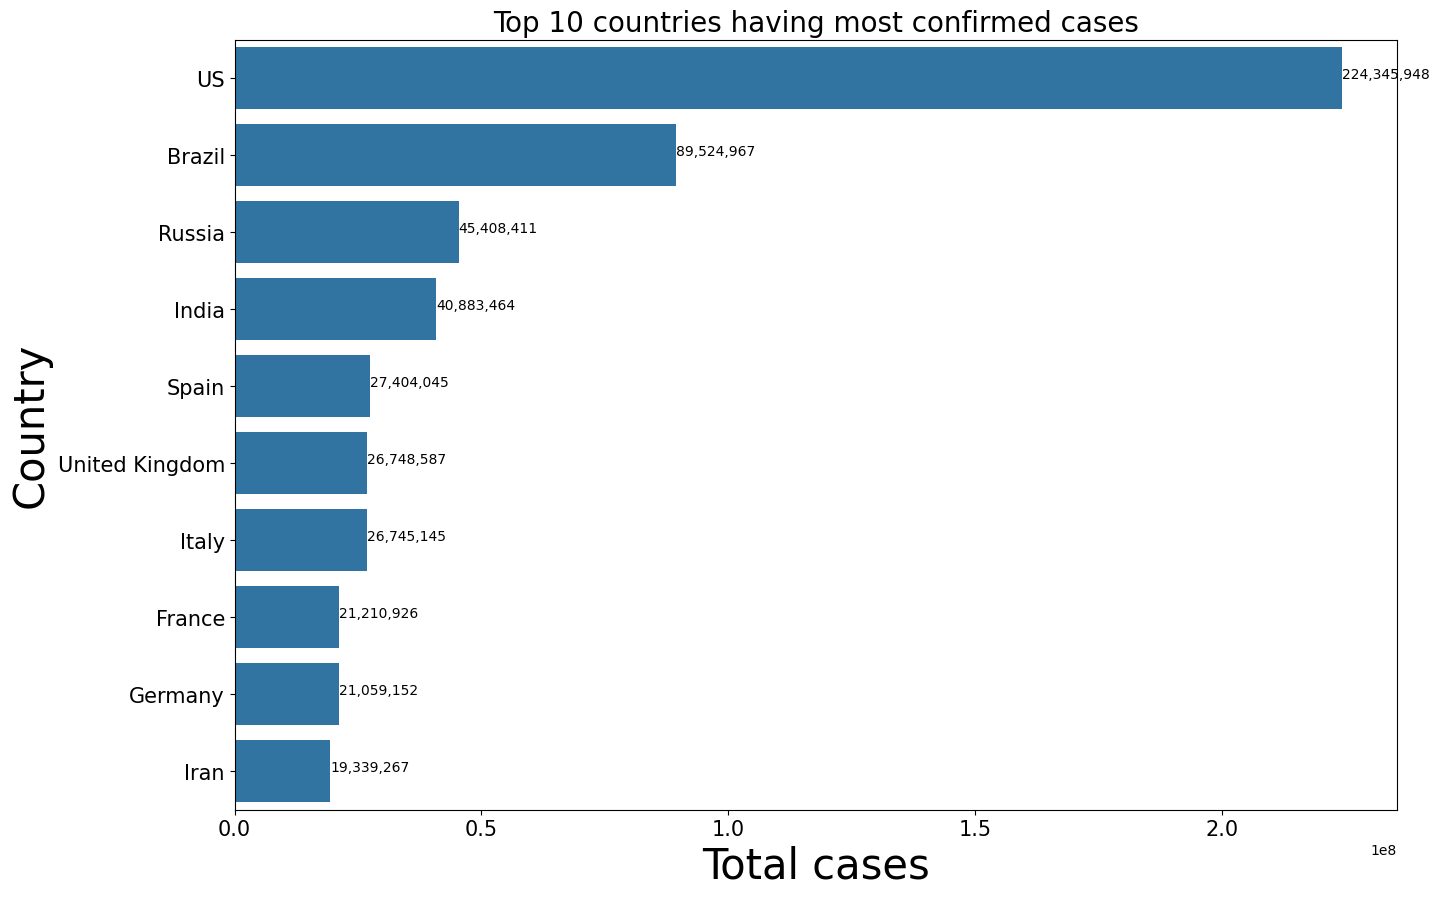

In [103]:
plt.figure(figsize= (15,10))

ax = sns.barplot(x=top_casualities['Confirmed'],
                 y=top_casualities['Country/Region'])

for i, (value, name) in enumerate(zip(top_casualities['Confirmed'], top_casualities['Country/Region'])):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country/Region')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases', fontsize=30)
plt.ylabel('Country', fontsize=30)
plt.title('Top 10 countries having most confirmed cases', fontsize=20)

In [104]:
df_COVID['Country/Region'].value_counts()

Country/Region
China                    6204
Canada                   2256
France                   2068
United Kingdom           2068
Australia                1504
                         ... 
Sao Tome and Principe     188
Yemen                     188
Comoros                   188
Tajikistan                188
Lesotho                   188
Name: count, Length: 187, dtype: int64

In [105]:
df_China = df_COVID.loc[df_COVID['Country/Region'] == 'China',['Date', 'Confirmed','Deaths','Recovered','Active']]
df_China

,Date,Confirmed,Deaths,Recovered,Active
48,2020-01-22,1,0,0,1
49,2020-01-22,14,0,0,14
50,2020-01-22,6,0,0,6
51,2020-01-22,1,0,0,1
52,2020-01-22,0,0,0,0
...,...,...,...,...,...
48883,2020-07-27,204,3,195,6
48884,2020-07-27,1,0,1,0
48885,2020-07-27,311,3,73,235
48886,2020-07-27,190,2,186,2


Mean Squared Error (MSE): 18838245490.75016


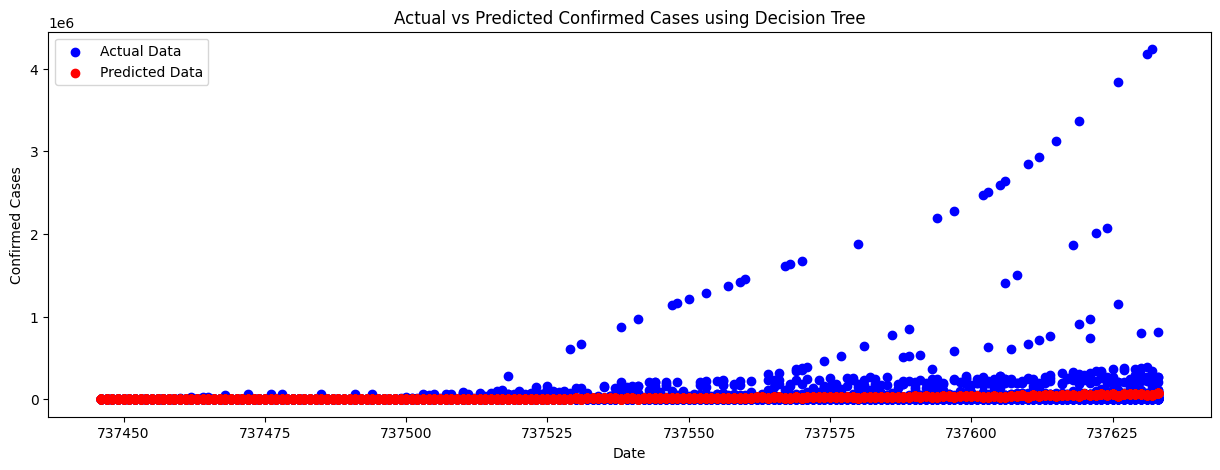

In [106]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is already your dataset and you have 'Date' and 'Confirmed' columns

# Prepare data (convert date to numerical format)
df_COVID['Date'] = pd.to_datetime(df_COVID['Date'])
df_COVID['Date'] = df_COVID['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)

# Define features (X) and target (y)
X = df_COVID[['Date']]  # Feature: Date
y = df_COVID['Confirmed']  # Target: Confirmed cases

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')  # Predicted data points
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Decision Tree')
plt.legend()
plt.show()

Mean Squared Error (MSE): 17220206248.279152


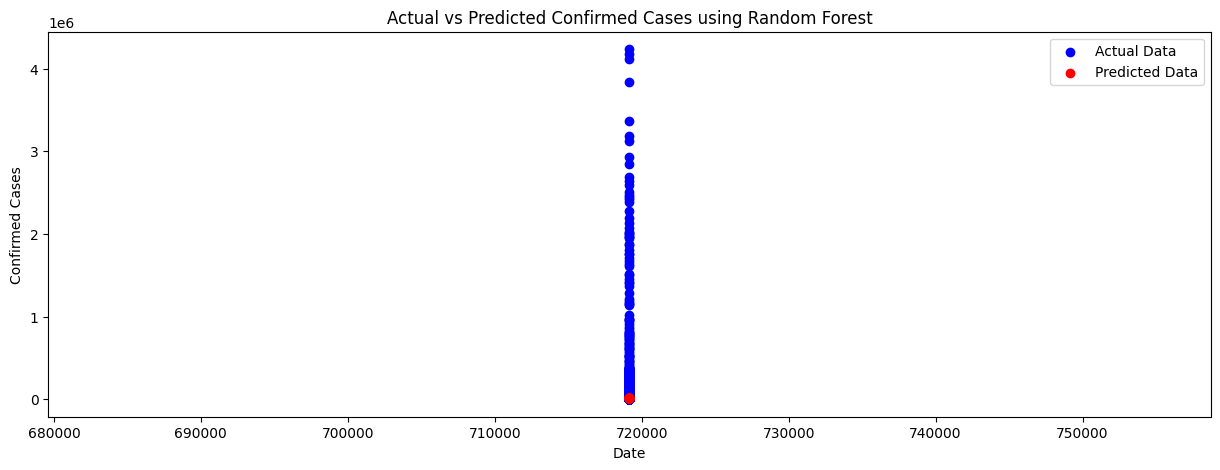

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt


# Prepare data (convert date to numerical format)
df_COVID['Date'] = pd.to_datetime(df_COVID['Date'])
df_COVID['Date'] = df_COVID['Date'].map(pd.Timestamp.toordinal)  # Convert date to ordinal format (numeric)

# Define features (X) and target (y)
X = df_COVID[['Date']]  
y = df_COVID['Confirmed'] 

# Split data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Plot the original data and the predicted values
plt.figure(figsize=(15,5))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')  # Actual data points
plt.scatter(X_test, y_pred, color='red', label='Predicted Data')  # Predicted data points
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Actual vs Predicted Confirmed Cases using Random Forest')
plt.legend()
plt.show()

In [108]:
df_COVID['Day'] = (df_COVID['Date'] - df_COVID['Date'].min())
X = df_COVID[['Day']]
y = df_COVID['Confirmed']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on test set
predictions = model.predict(X_test)

In [109]:
from sklearn.metrics import mean_absolute_error, r2_score ,mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae}')
print(f'mse: {mse}')

Mean Absolute Error: 28718.174383950096
mse: 19027548181.53383
